### Student Information
Name: Daria Podcheshynska

Student ID: 107065710

GitHub ID: rainbowrytsar

Kaggle name: Daria Podcheshynska

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

Ex1 Plot word frequency for Top 30 words in both train and test dataset. 

In [38]:
import pandas as pd

anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [39]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [40]:
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [41]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

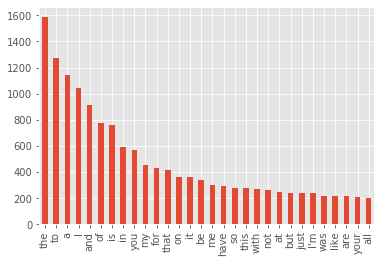

In [42]:
train_df.text.str.split(expand=True).stack().value_counts()[:30].plot.bar()

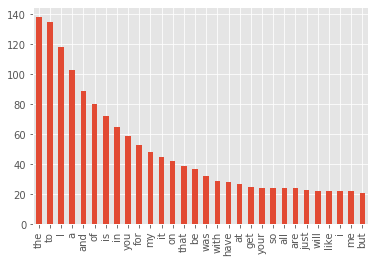

In [43]:
test_df.text.str.split(expand=True).stack().value_counts()[:30].plot.bar()

Ex 2:

Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [45]:
tfidf_vectorizer=TfidfVectorizer(max_features=1000,use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(train_df['text'])

In [46]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])

In [47]:
tfidf_vectorizer.get_feature_names()[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

In [48]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
fitted_vectorizer=tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = fitted_vectorizer.transform(train_df['text'])
test_data_tfidf_features = fitted_vectorizer.transform(test_df['text'])

In [49]:
train_data_tfidf_features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

 Ex 3 : 

Confussion matrix represents the performance of the model on the set with knows values (aka train set). 
Horizontal axis stands for the actual values, while vertical is there for predicted values. Number in the cell (i,j) shows the number of cases that model gave tag i with actual tag j. 
We can notice that the model performs the best on the tag 'fear', the worst- on'sadness'.

Ex 4 
Build a model using a Naive Bayes model and train it. What are the testing results? 


In [50]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

train_data_BOW_features_500.shape
feature_names_500 = BOW_500.get_feature_names()

In [51]:
from sklearn.naive_bayes import MultinomialNB
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
clf = MultinomialNB()
clf=clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


Ex 5

Decision Trees  work with classification problems and regression problems. So if you are trying to predict a categorical value like (red, green, up, down) or if you are trying to predict a continuous value like 2.9, 3.4 etc Decision Trees will handle both problems. Decision Trees build a classifier directly from that data without needing any up front design work to take place. But simple decision trees tend to overfit the training data more so that other techniques. Also simple decision trees divide the data into squares so building clusters around things means it has to split a lot to encompass clusters of data. Splitting a lot leads to complex trees and raises probability you are overfitting. Tall trees get pruned back so while you can build a cluster around some feature in the data it might not survive the pruning process.
Naive Bayes requires you build a classification by hand. Picking which features matter is up to you. Decisions trees will pick the best features for you from tabular data. If there were a way for Naive Bayes to pick features you'd be getting close to using the same techniques that make decision trees work like that. Give this fact that means you may need to combine Naive Bayes with other statistical techniques to help guide you towards what features best classify and that could be using decision trees. Naive bayes will answer as a continuous classifier. There are techniques to adapt it to categorical prediction however they will answer in terms of probabilities like (A 90%, B 5%, C 2.5% D 2.5%) Bayes can perform quite well, and it doesn't over fit nearly as much so there is no need to prune or process the network. 
Naive bayes does quite well when the training data doesn't contain all possibilities so it can be very good with low amounts of data. Decision trees work better with lots of data compared to Naive Bayes.

Ex 6

In [55]:
import keras

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)



X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2738        joy
2591        joy
2867    sadness
2990    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [57]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [58]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

model_input = Input(shape=(input_shape, ))  
X = model_input

X_W1 = Dense(units=64)(X)  
H1 = ReLU()(X_W1)

H1_W2 = Dense(units=64)(H1)  
H2 = ReLU()(H1_W2)

H2_W3 = Dense(units=output_shape)(H2) 
H3 = Softmax()(H2_W3)

model_output = H3

model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_5 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_6 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_2 (Softmax)          (None, 4)                 0   

In [59]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

epochs = 25
batch_size = 32

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 235us/step - loss: 1.3239 - accuracy: 0.3698 - val_loss: 1.2798 - val_accuracy: 0.4294
Epoch 2/25
3613/3613 [==============================] - 0s 48us/step - loss: 0.9851 - accuracy: 0.6391 - val_loss: 0.9674 - val_accuracy: 0.6427
Epoch 3/25
3613/3613 [==============================] - 0s 41us/step - loss: 0.5864 - accuracy: 0.7985 - val_loss: 0.7961 - val_accuracy: 0.7176
Epoch 4/25
3613/3613 [==============================] - 0s 46us/step - loss: 0.4068 - accuracy: 0.8536 - val_loss: 0.7908 - val_accuracy: 0.6974
Epoch 5/25
3613/3613 [==============================] - 0s 43us/step - loss: 0.3245 - accuracy: 0.8865 - val_loss: 0.8426 - val_accuracy: 0.6830
Epoch 6/25
3613/3613 [==============================] - 0s 42us/step - loss: 0.2595 - accuracy: 0.9100 - val_loss: 0.9127 - val_accuracy: 0.6945
Epoch 7/25
3613/3613 [==============================] - 0s 48us/step - loss: 0.217

In [60]:
import numpy as np
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

testing accuracy: 0.63


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369776,1.323856,0.429395,1.279811
1,1,0.639081,0.985065,0.642651,0.967382
2,2,0.798505,0.586418,0.717579,0.796112
3,3,0.853584,0.406807,0.697406,0.790770
4,4,0.886521,0.324516,0.682997,0.842619
5,5,0.910047,0.259522,0.694524,0.912673
6,6,0.926377,0.217731,0.674352,0.965928
7,7,0.943814,0.182926,0.674352,1.012723
8,8,0.952117,0.156986,0.668588,1.075720
9,9,0.957653,0.138959,0.677233,1.173474


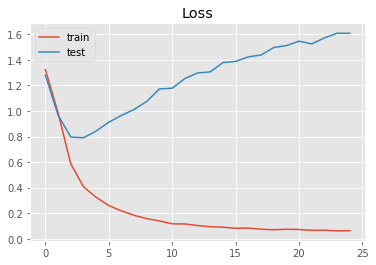

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



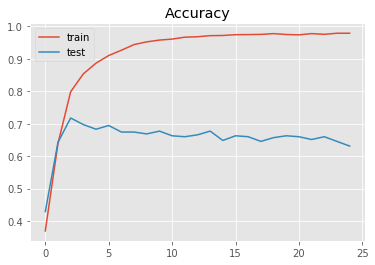

In [62]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

History callback records training metrics for each epoch. 
This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.
The plots can provide an indication of useful things about the training of the model, such as:
It’s speed of convergence over epochs (slope).
Whether the model may have already converged (plateau of the line).
Whether the mode may be over-learning the training data (inflection for validation line).
If talk abouth this particular model, we notice that before the 3-rd epoch model was learning from the data, after the 3-rd the overfitting happened and the performance kept getting worse.

Ex 7

The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words.
Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. Those guesses can be used to establish a word’s association with other words (e.g. “man” is to “boy” what “woman” is to “girl”), or cluster documents and classify them by topic. Those clusters can form the basis of sentiment analysis.
The output of the Word2vec neural net is a vocabulary in which each item has a vector attached to it, which can be fed into a deep-learning net or simply queried to detect relationships between words.

Ex 8, unfinished

In [64]:
from gensim.models import KeyedVectors

model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

MemoryError: Unable to allocate array with shape (3000000, 300) and data type float32

In [ ]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 3

Third: This part is worth 30% of your grade. A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.

